### Wahl des Algorithmus: Lineare Regression
Lineare Regression scheint wie eine gute Option für eine einfache Vorhersage des Originalpreises basierend 
auf dem Rabattpreis. Lineare Regression modelliert eine lineare Beziehung zwischen den unabhängigen und der
abhängigen Variablen

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Annahme: Die CSV-Datei 'steam_games.csv' befindet sich im gleichen Verzeichnis wie dein Notebook.
steam_data = pd.read_csv('steam_games.csv')
print("Daten erfolgreich geladen.")

In [19]:
def clean_price(price_value):
    if isinstance(price_value, (int, float)):
        return price_value
    if pd.isna(price_value):
        return 0
    if isinstance(price_value, str) and ('free' in price_value.lower() or price_value.strip() == ''):
        return 0
    if isinstance(price_value, str):
        price_str = price_value.replace('$', '').replace('€', '').replace(',', '.').strip()
        try:
            return float(price_str)
        except ValueError:
            return 0
    return 0

steam_data['release_date'] = pd.to_datetime(steam_data['release_date'], errors='coerce')
steam_data['original_price'] = steam_data['original_price'].apply(clean_price)
steam_data['discount_price'] = steam_data['discount_price'].fillna(steam_data['original_price']).apply(clean_price)
steam_data['release_year'] = steam_data['release_date'].dt.year
steam_data['primary_genre'] = steam_data['genre'].str.split(',').str[0]

print("Datenbereinigung abgeschlossen.")

Datenbereinigung abgeschlossen.


In [20]:
features = ['discount_price', 'release_year']
target = 'original_price'

# Entferne Zeilen mit fehlenden Werten in den ausgewählten Spalten
data_for_model = steam_data.dropna(subset=features + [target])
X = data_for_model[features]
y = data_for_model[target]

print("Features und Zielvariable ausgewählt.")

Features und Zielvariable ausgewählt.


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datensatz aufgeteilt in Trainings- und Testdaten.")
print(f"Trainingsdaten (Features): {X_train.shape}")
print(f"Testdaten (Features): {X_test.shape}")
print(f"Trainingsdaten (Ziel): {y_train.shape}")
print(f"Testdaten (Ziel): {y_test.shape}")

Datensatz aufgeteilt in Trainings- und Testdaten.
Trainingsdaten (Features): (2557, 2)
Testdaten (Features): (640, 2)
Trainingsdaten (Ziel): (2557,)
Testdaten (Ziel): (640,)


In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Lineares Regressionsmodell trainiert.")

Lineares Regressionsmodell trainiert.


Modellbewertung:
Mittlerer quadratischer Fehler (MSE): 584.32
R-Quadrat (R^2): 0.15


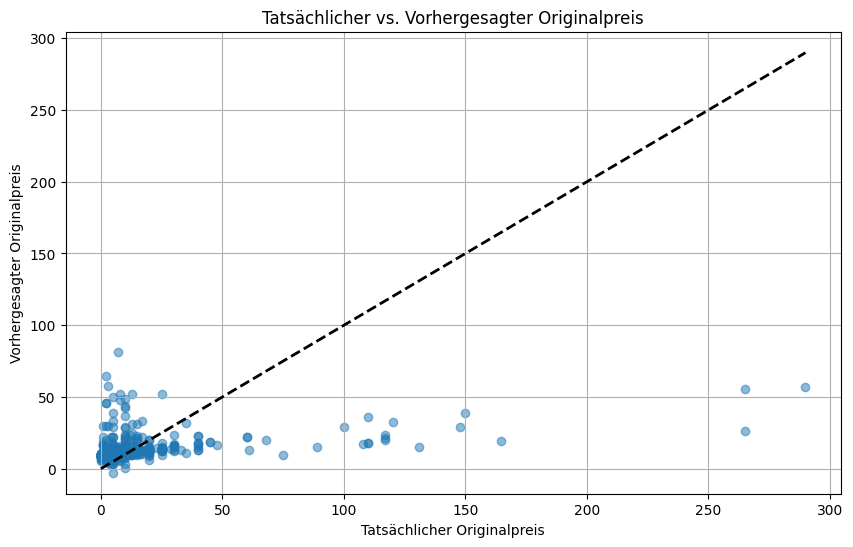

In [23]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Modellbewertung:")
print(f"Mittlerer quadratischer Fehler (MSE): {mse:.2f}")
print(f"R-Quadrat (R^2): {r2:.2f}")

# Optional: Visualisiere die Vorhersagen vs. die tatsächlichen Werte
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Tatsächlicher Originalpreis')
plt.ylabel('Vorhergesagter Originalpreis')
plt.title('Tatsächlicher vs. Vorhergesagter Originalpreis')
plt.grid(True)
plt.show()

# Die Bewertung

Die Bewertung sieht überhaupt nicht gut aus. Die Bewertung ergab einen mittleren quadratischen Fehler (MSE) von 584.12 und einen R-Quadrat-Wert von 0.15. Das bedeutet dass das Modell einen sehr hohen durchschnittlichen Fehler bei den Preisvorhersagen zeigt und konnte nur einen kleinen Teil (15%) der Gründe für die unterschiedlichen Preise der Spiele wirklich verstehen.  